In [5]:
import pandas as pd

#loading the data
df_specs = pd.read_csv("EV Vehicles.csv")

In [7]:
print(df_specs.head())

  Vehicle Type   Price  Charge Time           Car Name  Range (In KM)
0          2 W  104758            7   Ampere Magnus EX            121
1          2 W   66053           10  Ampere Magnus Pro             45
2          2 W   61993           10         Ampere REO             45
3          2 W   96544            7        Ampere Zeal            120
4          2 W  135489            8         Ather 450X            111


In [9]:
# Standardize spacing and casing
df_specs['Vehicle Type'] = df_specs['Vehicle Type'].str.strip().str.lower()

# Replace variants with standard terms
df_specs['Vehicle Type'] = df_specs['Vehicle Type'].replace({
    '2 w': '2W', '2w': '2W',
    '3 w': '3W', '3w': '3W',
    '4 w': '4W', '4w': '4W'
})

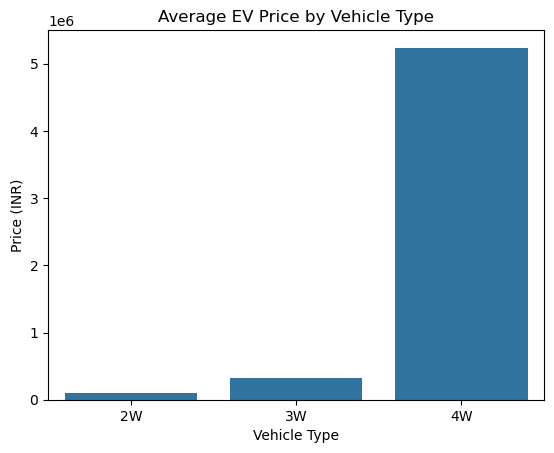

In [11]:
avg_price = df_specs.groupby('Vehicle Type')['Price'].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=avg_price, x='Vehicle Type', y='Price')
plt.title("Average EV Price by Vehicle Type")
plt.ylabel("Price (INR)")
plt.xlabel("Vehicle Type")
plt.show()

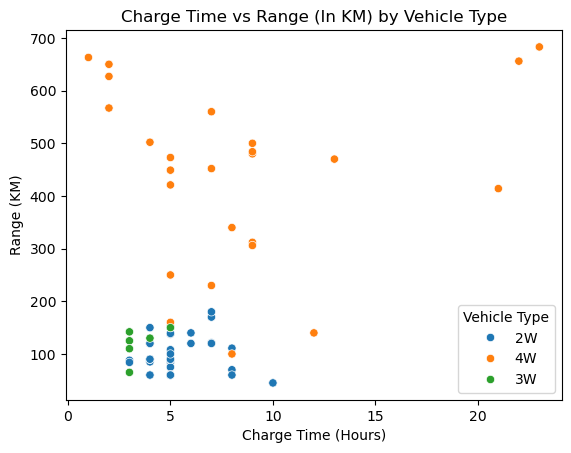

In [12]:
sns.scatterplot(data=df_specs, x='Charge Time', y='Range (In KM)', hue='Vehicle Type')
plt.title("Charge Time vs Range (In KM) by Vehicle Type")
plt.xlabel("Charge Time (Hours)")
plt.ylabel("Range (KM)")
plt.legend(title="Vehicle Type")
plt.show()

In [13]:
df_state = pd.read_csv("State-wise operational public charging stations.csv")
df_sanctioned = pd.read_csv("sanctioned ev stations.csv")

In [14]:
print(df_state.head())
print(df_sanctioned.head())

              State   No. of Operational PCS
0  Andaman & Nicobar                     3.0
1     Andhra Pradesh                   222.0
2  Arunachal Pradesh                     9.0
3              Assam                    48.0
4              Bihar                    83.0
            State  No. of EV Chargers Sanctioned
0     Maharashtra                            317
1  Andhra Pradesh                            266
2      Tamil Nadu                            281
3         Gujarat                            278
4   Uttar Pradesh                            207


In [15]:
df_state.rename(columns={'State ': 'States'}, inplace=True)
df_sanctioned.rename(columns={'State': 'States'}, inplace=True)

In [16]:
print(df_state.columns)
print(df_sanctioned.columns)


Index(['States', 'No. of Operational PCS'], dtype='object')
Index(['States', 'No. of EV Chargers Sanctioned'], dtype='object')


In [17]:
print("After renaming:")
print("df_state columns:", df_state.columns.tolist())
print("df_sanctioned columns:", df_sanctioned.columns.tolist())

After renaming:
df_state columns: ['States', 'No. of Operational PCS']
df_sanctioned columns: ['States', 'No. of EV Chargers Sanctioned']


In [25]:
print("df_state preview:\n", df_state.head())
print("df_sanctioned preview:\n", df_sanctioned.head())

df_state preview:
               States  No. of Operational PCS
0  Andaman & Nicobar                     3.0
1     Andhra Pradesh                   222.0
2  Arunachal Pradesh                     9.0
3              Assam                    48.0
4              Bihar                    83.0
df_sanctioned preview:
            States  No. of EV Chargers Sanctioned
0     Maharashtra                            317
1  Andhra Pradesh                            266
2      Tamil Nadu                            281
3         Gujarat                            278
4   Uttar Pradesh                            207


In [27]:
# Clean and rename operational dataset
df_state.rename(columns={
    'States': 'state',
    'No. of Operational PCS': 'operational_count'
}, inplace=True)

# Ensure it's numeric (even if it looks like float)
df_state['operational_count'] = pd.to_numeric(df_state['operational_count'], errors='coerce').fillna(0)

# Clean and rename sanctioned dataset
df_sanctioned.rename(columns={
    'States': 'state',
    'No. of EV Chargers Sanctioned': 'sanctioned_count'
}, inplace=True)

# Make sure sanctioned_count is integer if already clean
df_sanctioned['sanctioned_count'] = df_sanctioned['sanctioned_count'].astype(int)


In [29]:
print(df_state.head())
print(df_sanctioned.head())

               state  operational_count
0  Andaman & Nicobar                3.0
1     Andhra Pradesh              222.0
2  Arunachal Pradesh                9.0
3              Assam               48.0
4              Bihar               83.0
            state  sanctioned_count
0     Maharashtra               317
1  Andhra Pradesh               266
2      Tamil Nadu               281
3         Gujarat               278
4   Uttar Pradesh               207


In [31]:
# Merge datasets
df_combined = pd.merge(df_state, df_sanctioned, on='state', how='outer')

# Fill NaNs just in case, and compute total
df_combined['total_stations'] = (
    df_combined['operational_count'].fillna(0) + 
    df_combined['sanctioned_count'].fillna(0)
)

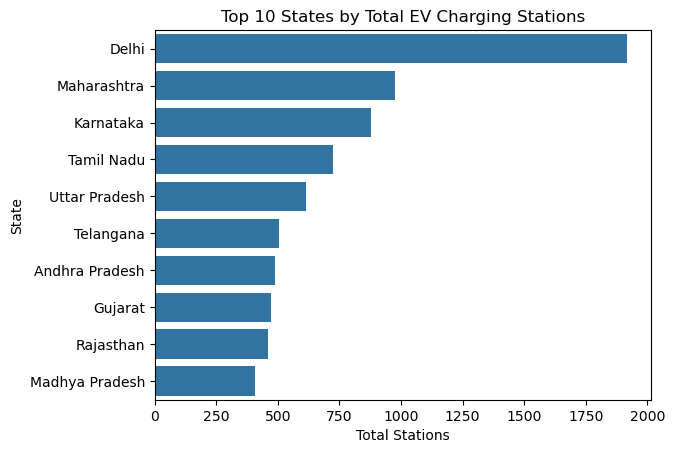

In [33]:

top_states = df_combined.sort_values('total_stations', ascending=False).head(10)

sns.barplot(data=top_states, x='total_stations', y='state')
plt.title("Top 10 States by Total EV Charging Stations")
plt.xlabel("Total Stations")
plt.ylabel("State")
plt.show()

In [35]:
df_highways = pd.read_csv("National highway wise operational Public EV Charging Stations.csv")

In [37]:
print(df_highways.head())

       National Highway  No. of operational PCS
0   National Highway-10                       1
1   National Highway-11                       3
2  National Highway-128                       1
3   National Highway-13                       3
4  National Highway-130                       1


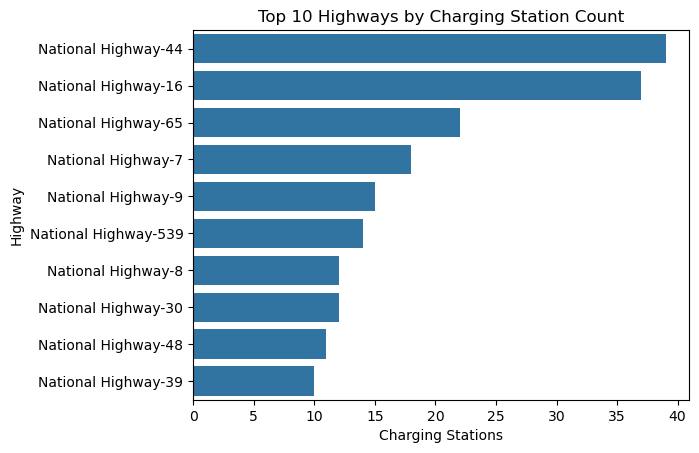

In [39]:
top_highways = df_highways.sort_values('No. of operational PCS', ascending=False).head(10)

sns.barplot(data=top_highways, x='No. of operational PCS', y='National Highway')
plt.title("Top 10 Highways by Charging Station Count")
plt.xlabel("Charging Stations")
plt.ylabel("Highway")
plt.show()

In [41]:
summary = df_specs.groupby('Vehicle Type').agg({
    'Price': 'mean',
    'Charge Time': 'mean',
    'Range (In KM)': 'mean'
}).reset_index()

summary['infra_ready_states'] = [15, 10, 8]  # Example values for 2W, 3W, 4W

print(summary)

  Vehicle Type         Price  Charge Time  Range (In KM)  infra_ready_states
0           2W  9.476390e+04     5.410256     100.666667                  15
1           3W  3.186667e+05     3.500000     120.333333                  10
2           4W  5.238200e+06     8.360000     435.560000                   8


In [43]:
# Load the datasets
df_2w = pd.read_csv("2-wheeler-EV-bikewale.csv")
df_4w = pd.read_csv("4-wheeler-EV-carwale.csv")

In [45]:
# Check shape and columns
print("2W shape:", df_2w.shape)
print("4W shape:", df_4w.shape)
print("\n2W columns:", df_2w.columns.tolist())
print("\n4W columns:", df_4w.columns.tolist())

2W shape: (844, 14)
4W shape: (129, 10)

2W columns: ['review', 'Used it for', 'Owned for', 'Ridden for', 'rating', 'Visual Appeal', 'Reliability', 'Performance', 'Service Experience', 'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money', 'Model Name']

4W columns: ['review', 'Exterior', 'Comfort', 'Performance', 'Fuel Economy', 'Value for Money', 'Condition', 'driven', 'rating', 'model_name']


In [47]:
# Standardize column names
df_2w.columns = df_2w.columns.str.strip().str.lower().str.replace(" ", "_")
df_4w.columns = df_4w.columns.str.strip().str.lower().str.replace(" ", "_")

In [49]:
print("2W nulls:\n", df_2w.isnull().sum())
print("\n4W nulls:\n", df_4w.isnull().sum())

2W nulls:
 review                 47
used_it_for             0
owned_for               0
ridden_for            176
rating                  0
visual_appeal         105
reliability           128
performance           499
service_experience    141
extra_features        659
comfort               314
maintenance_cost      664
value_for_money       454
model_name              0
dtype: int64

4W nulls:
 review             0
exterior           0
comfort            0
performance        0
fuel_economy       0
value_for_money    0
condition          0
driven             0
rating             0
model_name         0
dtype: int64


In [51]:
# STEP 1: Drop rows with no actual review
df_2w.dropna(subset=['review'], inplace=True)

# STEP 2: Fill missing categorical text fields
df_2w['ridden_for'] = df_2w['ridden_for'].fillna("Not Provided")

# STEP 3: Convert numeric score columns and fill with mean
numeric_cols = [
    'visual_appeal', 'reliability', 'performance', 'service_experience',
    'extra_features', 'comfort', 'maintenance_cost', 'value_for_money'
]

for col in numeric_cols:
    df_2w[col] = pd.to_numeric(df_2w[col], errors='coerce')  # ensure numeric
    df_2w[col] = df_2w[col].fillna(df_2w[col].mean())         # fill nulls

In [53]:
df_2w.to_csv("cleaned_2W_reviews.csv", index=False)
df_4w.to_csv("cleaned_4W_reviews.csv", index=False)

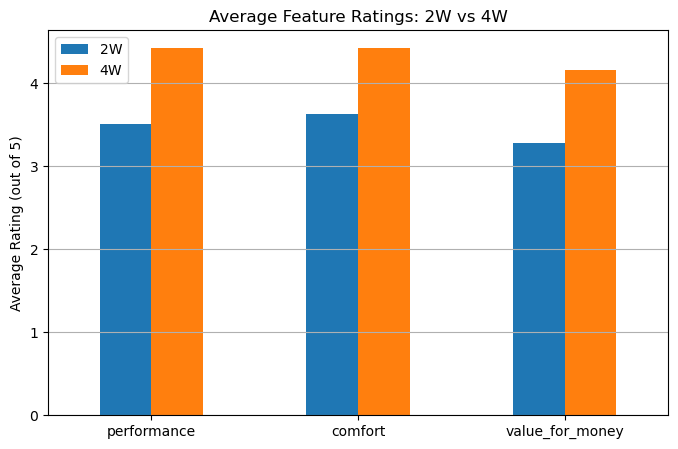

In [55]:
# Step 1: Choose common features to compare
features_2w = df_2w[['performance', 'comfort', 'value_for_money']].mean()
features_4w = df_4w[['performance', 'comfort', 'value_for_money']].mean()

# Step 2: Combine into one DataFrame
comparison_df = pd.DataFrame({
    '2W': features_2w,
    '4W': features_4w
})

# Step 3: Plot
comparison_df.plot(kind='bar', figsize=(8, 5))
plt.title("Average Feature Ratings: 2W vs 4W")
plt.ylabel("Average Rating (out of 5)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

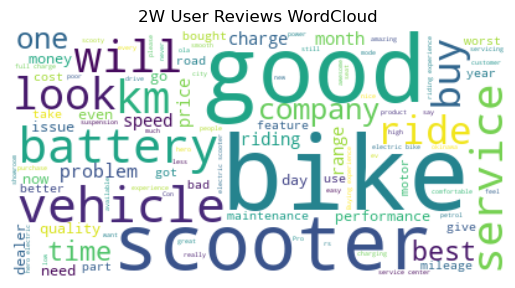

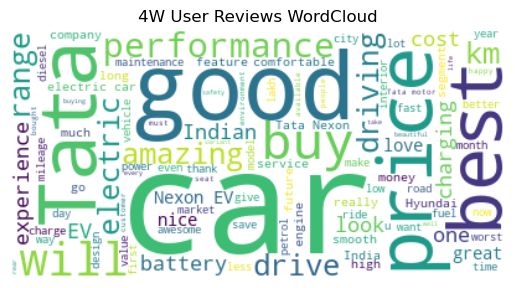

In [57]:
from wordcloud import WordCloud

# Combine all 2W reviews
text_2w = ' '.join(df_2w['review'].dropna())
text_4w = ' '.join(df_4w['review'].dropna())

# Generate WordCloud for 2W
wc_2w = WordCloud(background_color="white", max_words=100).generate(text_2w)
plt.imshow(wc_2w, interpolation="bilinear")
plt.axis("off")
plt.title("2W User Reviews WordCloud")
plt.show()

# Generate WordCloud for 4W
wc_4w = WordCloud(background_color="white", max_words=100).generate(text_4w)
plt.imshow(wc_4w, interpolation="bilinear")
plt.axis("off")
plt.title("4W User Reviews WordCloud")
plt.show()


In [58]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [59]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\salon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

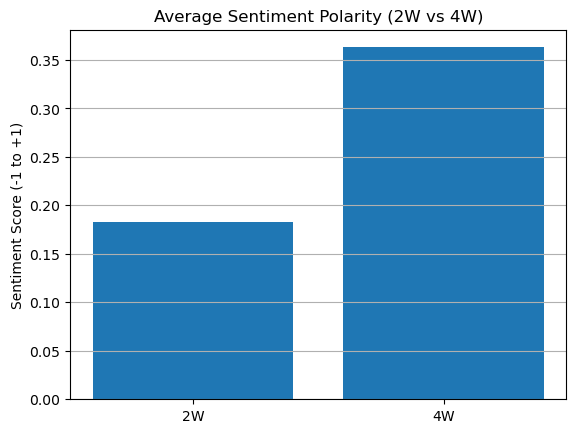

In [61]:
from textblob import TextBlob

# Create sentiment column
df_2w['sentiment'] = df_2w['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_4w['sentiment'] = df_4w['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Average sentiment comparison
avg_sentiment = {
    '2W': df_2w['sentiment'].mean(),
    '4W': df_4w['sentiment'].mean()
}

import matplotlib.pyplot as plt

plt.bar(avg_sentiment.keys(), avg_sentiment.values())
plt.title("Average Sentiment Polarity (2W vs 4W)")
plt.ylabel("Sentiment Score (-1 to +1)")
plt.grid(axis='y')
plt.show()

In [62]:
from sklearn.preprocessing import StandardScaler

# Select features from your main EV specs dataset
features = df_specs[['Price', 'Range (In KM)', 'Charge Time']]

# Optional: add average rating or sentiment from review dataset
#features['rating'] = df_specs['rating']  # or merge from review data if in separate DataFrame

# Scale the features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [64]:
from sklearn.cluster import KMeans

# Choose number of clusters (e.g., 3 for low-mid-high segments)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to your dataset
df_specs['segment'] = clusters

C:\Users\salon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [66]:
import warnings
warnings.filterwarnings("ignore")

In [67]:
df_specs['segment'] = clusters

In [70]:
df_specs['segment'].value_counts()

segment
0    53
1     9
2     8
Name: count, dtype: int64

In [75]:
# Group by segment to see the average profile
segment_summary = df_specs.groupby('segment')[['Price', 'Range (In KM)', 'Charge Time', ]].mean()
print(segment_summary)

                Price  Range (In KM)  Charge Time
segment                                          
0        2.756753e+05     122.377358     5.566038
1        2.896889e+06     533.777778     3.666667
2        1.198500e+07     530.875000    14.125000


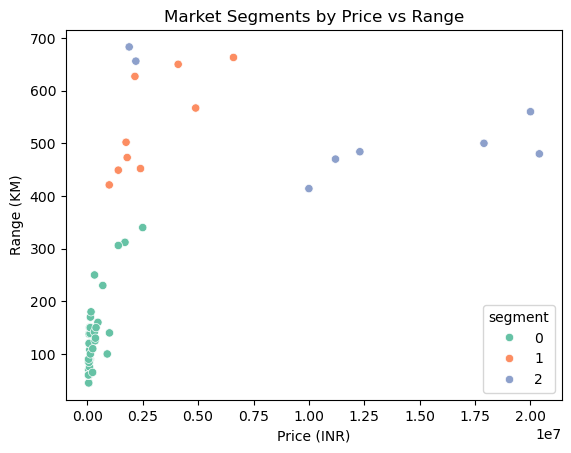

In [77]:
sns.scatterplot(data=df_specs, x='Price', y='Range (In KM)', hue='segment', palette='Set2')
plt.title("Market Segments by Price vs Range")
plt.xlabel("Price (INR)")
plt.ylabel("Range (KM)")
plt.show()

In [79]:
df_specs.groupby('segment')[['Price', 'Range (In KM)', 'Charge Time', ]].mean()

,Price,Range (In KM),Charge Time
segment,,,
0,2.756753e+05,122.377358,5.566038
1,2.896889e+06,533.777778,3.666667
2,1.198500e+07,530.875000,14.125000


In [81]:
# Display table with proper formatting

segment_summary.style.format({
    'Price': '₹{:,.0f}',               # Indian-style currency format, no decimals
    'Range (In KM)': '{:.1f} km'
    'Charge Time': '{:.2f} hrs'
})

,Price,Range (In KM),Charge Time
segment,,,
0,"₹275,675",122.4 km,5.57 hrs
1,"₹2,896,889",533.8 km,3.67 hrs
2,"₹11,985,000",530.9 km,14.12 hrs


In [90]:
# Calculate average, min, and max price by vehicle type
affordability = df_specs.groupby('Vehicle Type')['Price'].agg(['mean', 'min', 'max']).reset_index()
affordability.rename(columns={'mean': 'Avg Price', 'min': 'Min Price', 'max': 'Max Price'}, inplace=True)

# Format prices with ₹ symbol and comma separators
affordability['Avg Price'] = affordability['Avg Price'].apply(lambda x: f"₹{x:,.0f}")
affordability['Min Price'] = affordability['Min Price'].apply(lambda x: f"₹{x:,.0f}")
affordability['Max Price'] = affordability['Max Price'].apply(lambda x: f"₹{x:,.0f}")

# Display the formatted table
print(affordability)

  Vehicle Type   Avg Price Min Price    Max Price
0           2W     ₹94,764   ₹51,094     ₹171,250
1           3W    ₹318,667  ₹238,000     ₹394,000
2           4W  ₹5,238,200  ₹325,000  ₹20,400,000


In [94]:
# Normalize charge time and range
df_specs['norm_range'] = df_specs['Range (In KM)'] / df_specs['Range (In KM)'].max()
df_specs['norm_charge'] = 1 - (df_specs['Charge Time'] / df_specs['Charge Time'].max())

# Infra score = weighted average
df_specs['infra_score'] = (0.6 * df_specs['norm_range']) + (0.4 * df_specs['norm_charge'])

# Average by Vehicle Type
infra_summary = df_specs.groupby('Vehicle Type')['infra_score'].mean().reset_index()
print(infra_summary)

  Vehicle Type  infra_score
0           2W     0.394342
1           3W     0.444841
2           4W     0.637238
